In [15]:
import numpy as np 
import pandas as pd
from datetime import *
import glob
import matplotlib.pyplot as plt

In [13]:
from seiscat import sfile_read
from seiscat import mag_eqs

In [3]:
%load_ext autoreload
%autoreload 2

In [7]:
# Read in ML=2.4 Newdigate event
files=['../data/18-1333-00L.s201807']
event_cat,picks_cat = sfile_read.seisan_parsing(files)

# Print detail of the event
events_df=pd.DataFrame(event_cat)
events_df

,ID,DateTime,Latitude,Longitude,Depth,mag,mag_type,mag_agency
0,20180718133338,2018-07-18 13:33:18,51.158,-0.239,1.0,2.4,ML,BGS


In [8]:
# Print the individual events
picks_df=pd.DataFrame(picks_cat)
picks_amp=picks_df[picks_df.Phase=='IAML']
picks_amp

,ID,Station,Component,Phase,Date,Pick_Time,Amplitude,Period,Distance,Azimuth,BGS_Mag
1,20180718133338,RUSH,HN,IAML,2018-07-18,13:33:19.93,26053.4,0.29,2.33,241.0,2.4
2,20180718133338,RUSH,HE,IAML,2018-07-18,13:33:20.11,37150.2,0.29,2.33,241.0,2.4
4,20180718133338,HORS,HN,IAML,2018-07-18,13:33:20.85,26518.3,0.2,2.90,46.0,2.4
5,20180718133338,HORS,HE,IAML,2018-07-18,13:33:20.95,11551.4,0.22,2.90,46.0,2.4
8,20180718133338,HMNX,HN,IAML,2018-07-18,13:33:38.1,331.7,0.37,51.70,128.0,2.4
9,20180718133338,HMNX,HE,IAML,2018-07-18,13:33:40.2,500.1,0.56,51.70,128.0,2.4
11,20180718133338,ELSH,HN,IAML,2018-07-18,13:33:54.15,87.5,0.49,96.10,90.0,2.4
12,20180718133338,ELSH,HE,IAML,2018-07-18,13:34:0.57,165.7,0.59,96.10,90.0,2.4
14,20180718133338,SWN1,HE,IAML,2018-07-18,13:33:57.78,98.9,0.36,116.00,291.0,2.4
15,20180718133338,SWN1,HN,IAML,2018-07-18,13:34:10.04,180.1,0.51,116.00,291.0,2.4


  Station  Epidist    Hypodist       Amp        ML    ML_hut
0    RUSH     2.33    3.720067  31601.80  2.498670  3.049905
1    HORS     2.90    4.101219  19034.85  2.366694  2.877470
2    HMNX    51.70   51.781271    415.90  2.527479  2.527516
3    ELSH    96.10   96.143747    126.60  2.391342  2.391342
4    SWN1   116.00  116.036244    139.50  2.560940  2.560940


/Users/ab14785/opt/anaconda3/envs/pg/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


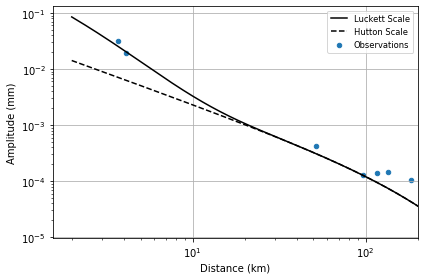

2.544936727304626


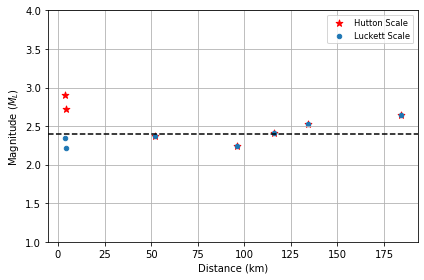

In [20]:
indexs=sfile_read.remove_duplicates(picks_amp.Station.values)

picks=picks_amp.set_index(['Station'])
# print(picks)


TT_cat={'Station':[],'Epidist':[],'Hypodist':[],'Amp':[],'ML':[],'ML_hut':[]}

for index in indexs:
#     print(index)
#     print(picks.loc[index])

    amp_mean=picks.loc[index].Amplitude.mean()
    epi=picks.loc[index].Distance.mean()
    hypo=np.sqrt(picks.loc[index].Distance.mean()**2+2.9**2)
    
    TT_cat['Station'].append(index)
    TT_cat['Epidist'].append(epi)
    TT_cat['Hypodist'].append(hypo)
    TT_cat['Amp'].append(amp_mean)
    TT_cat['ML'].append(mag_eqs.ml_luc(amp_mean,hypo))
    TT_cat['ML_hut'].append(mag_eqs.ml_hutton(amp_mean,hypo))
   
plt.figure(figsize=[6,4])
mag=events_df.mag.values
dist=np.arange(2,300.2,0.2)

amp_luc=mag_eqs.amp_luckett(mag,dist)
plt.plot(dist,amp_luc*1e-6,'k-',label='Luckett Scale')

amp_hut=mag_eqs.amp_hutton(mag,dist)
plt.loglog(dist,amp_hut*1e-6,'k--',label='Hutton Scale')

TT_df=pd.DataFrame(TT_cat)
print(TT_df.head())
# plt.scatter(TT_df.Epidist,TT_df.Amp,marker='x')
plt.scatter(TT_df.Hypodist,TT_df.Amp*1e-6,marker='o',s=20,label='Observations')

# plt.plot(dist,amp)
plt.xlabel('Distance (km)')
plt.ylabel('Amplitude (mm)')
plt.xlim(0,200)
# plt.ylim(0,0.01)
plt.grid()
plt.legend(fontsize='small')
plt.tight_layout()
# plt.savefig('Images/NEW_mag1-5_amp.png',dpi=300)
plt.show()

print(TT_df.ML.mean())

amp_corr=mag_eqs.amp_ml(mag,TT_df.Hypodist)

# plt.scatter(TT_df.Epidist,TT_df.Amp,marker='x')
plt.figure(figsize=[6,4])
plt.scatter(TT_df.Hypodist,TT_df.ML_hut-0.15,marker='*',s=50,c='r',label='Hutton Scale')
plt.scatter(TT_df.Hypodist,TT_df.ML-0.15,marker='o',s=20,label='Luckett Scale')

plt.axhline(y=2.4,c='k',ls='--')
# plt.plot(dist,amp)
plt.xlabel('Distance (km)')
plt.ylabel('Magnitude ($M_L$)')
# plt.xlim(0,25)
plt.grid()
plt.ylim(1,4)
plt.legend(fontsize='small')
plt.tight_layout()
# plt.savefig('Images/NEW_mag1-5.png',dpi=300)
plt.show()